In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# EDA


**Loading the Data**

In [2]:
data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

In [3]:
data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [4]:
data.shape

(20000, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [6]:
data.nunique()

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

In [7]:
data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [8]:
data.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [9]:
data['Victim_Age'].value_counts()

Victim_Age
 0.0     4828
 30.0     448
 31.0     446
 26.0     442
 29.0     425
         ... 
 98.0       2
-2.0        2
 92.0       2
 96.0       2
 94.0       2
Name: count, Length: 100, dtype: int64

**Insights**
* **Locations**: 12,399 unique locations with potential coordinate duplication; some entries have coordinates set to 0, indicating possible errors.
* **Age Distribution**: The distribution of victim ages (mean ~30 years) suggests crimes affect a broad age range, with a slight skew towards younger adults.
* **Victim Info**: Victim ages range widely (0 to 99); some data entry errors (e.g., age -2); 4 genders and 17 descent categories.
* **Modus Operandi**: The Modus_Operandi column has 10,489 unique entries, indicating diverse methods or tactics used in crimes, though this data is missing for 2,741 records.


**Changing the necessary values of Age, Modus Operandi and Latitude to *nan* so that is imputed by imputer in preprocessing.**

In [10]:
data['Modus_Operandi'] = data['Modus_Operandi'].fillna('missing')
test['Modus_Operandi'] = test['Modus_Operandi'].fillna('missing')

data['Victim_Age'] = data['Victim_Age'].apply(lambda x: np.nan if x <= 0 else x)
test['Victim_Age'] = test['Victim_Age'].apply(lambda x: np.nan if x <= 0 else x)

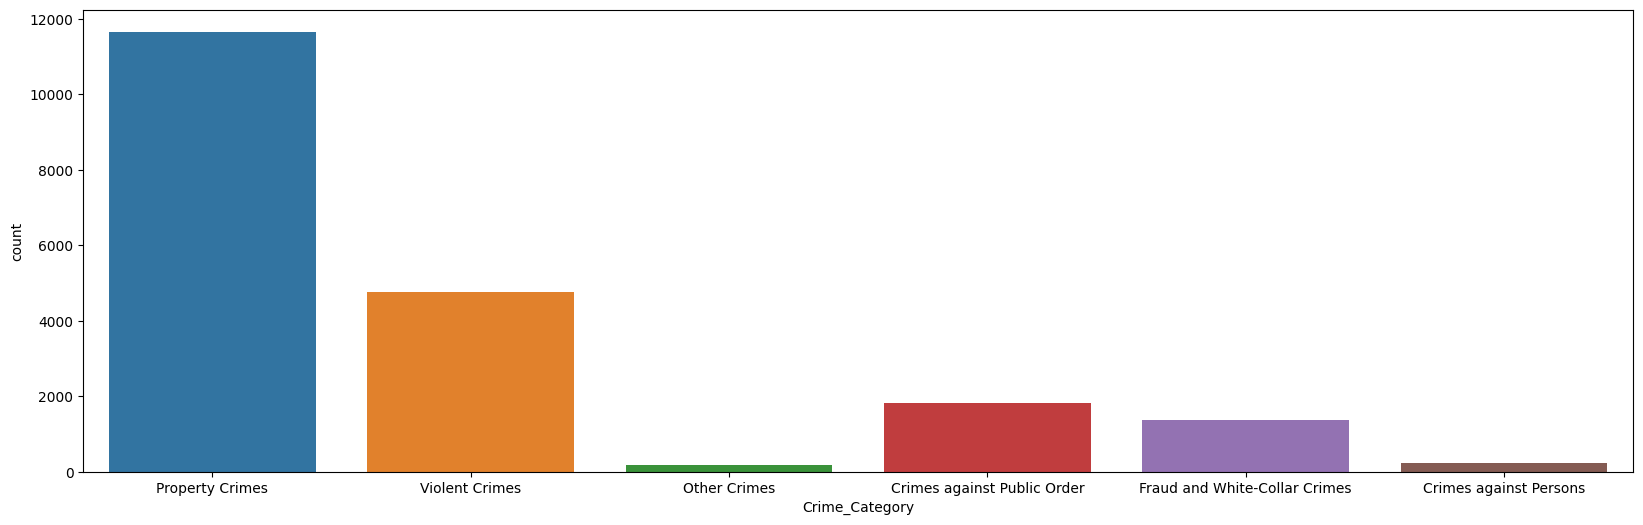

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
rating_value = data['Crime_Category'].value_counts()
sns.countplot(x='Crime_Category', data=data)
plt.show()

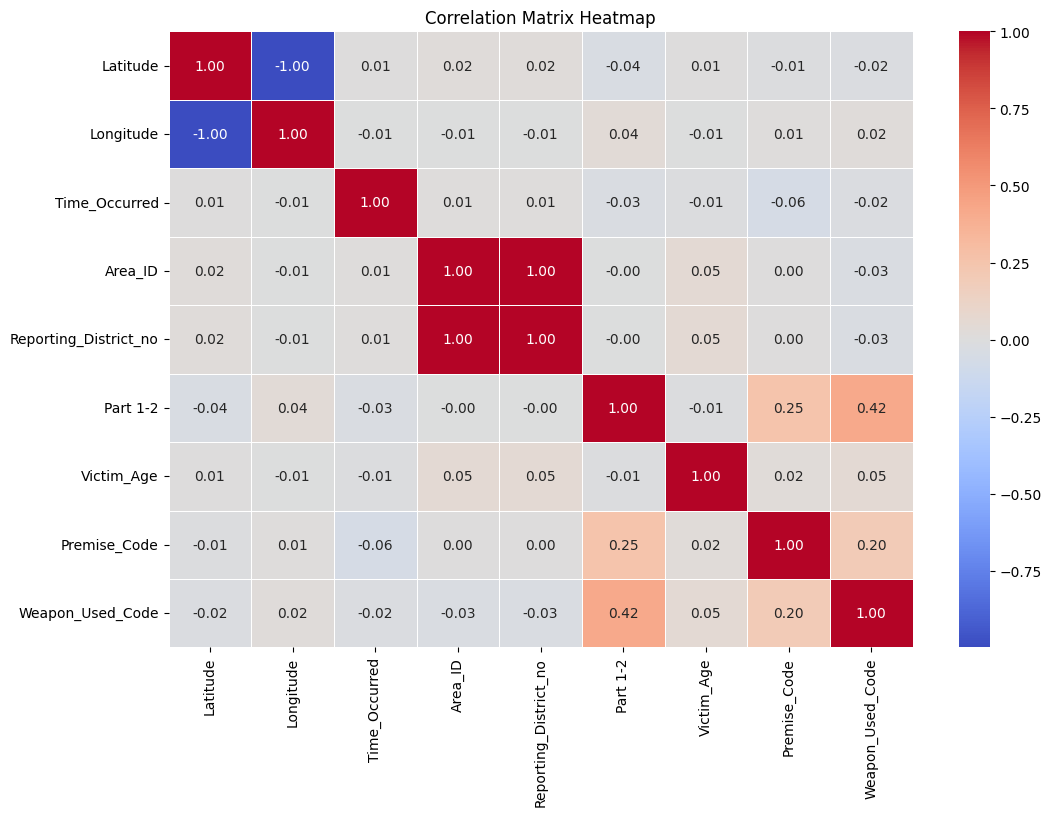

In [12]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

**Insights**
* Property Crimes are by far the most common, with about 12,000 incidents.
* Strong positive correlation (1.00) between Area_ID and Reporting_District_no, indicating they likely represent the same information.
* Moderate negative correlation (-0.57) between Latitude and Longitude, suggesting a geographical relationship.

**Droping Columns which are highly correlated or having large number of missing values**

In [13]:
data.drop(['Location', 'Cross_Street', 'Area_Name', 'Premise_Description', 'Weapon_Description', 'Status_Description', 'Reporting_District_no'], axis=1, inplace=True)

test.drop(['Location', 'Cross_Street', 'Area_Name', 'Premise_Description', 'Weapon_Description', 'Status_Description', 'Reporting_District_no'], axis=1, inplace=True)

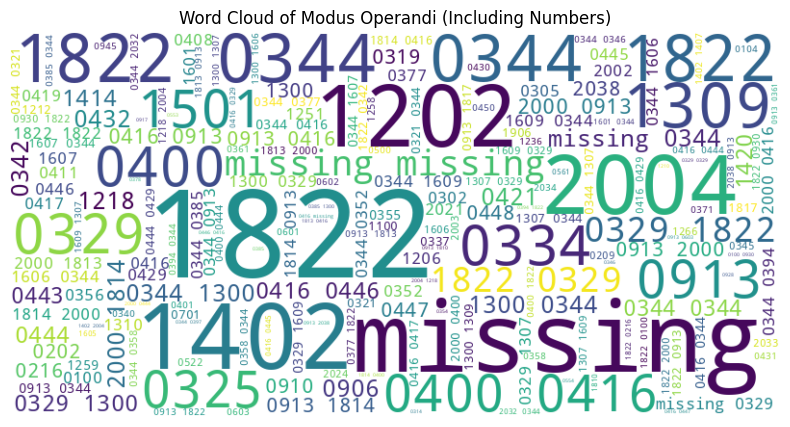

In [14]:
from wordcloud import WordCloud

# Combine all text in the Modus_Operandi column into a single string
text = ' '.join(data['Modus_Operandi'].dropna().astype(str))

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    include_numbers=True  # Include numbers in the word cloud
).generate(text)

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

plt.title('Word Cloud of Modus Operandi (Including Numbers)')

plt.show()


**Insights**
Larger numbers like 1822, 1402, 1202, 0334, and 2004 stand out. These may represent frequently occurring patterns or significant identifiers in the cases being analyzed.

Converting Date and Time Columns to Pandas Datetime and adding columns which will improve the model

In [15]:
data['Date_Reported'] = pd.to_datetime(data['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
data['Year_Reported'] = data['Date_Reported'].dt.year
data['Month_Reported'] = data['Date_Reported'].dt.month
data['Day_Reported'] = data['Date_Reported'].dt.day
data['DayOfWeek_Reported'] = data['Date_Reported'].dt.dayofweek
data['Is_Weekend_Reported'] = data['DayOfWeek_Reported'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday

test['Date_Reported'] = pd.to_datetime(test['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
test['Year_Reported'] = test['Date_Reported'].dt.year
test['Month_Reported'] = test['Date_Reported'].dt.month
test['Day_Reported'] = test['Date_Reported'].dt.day
test['DayOfWeek_Reported'] = test['Date_Reported'].dt.dayofweek
test['Is_Weekend_Reported'] = test['DayOfWeek_Reported'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for weekend, 0 for weekday

# Preprocessing

In [16]:
X = data.drop('Crime_Category', axis=1)
y = data['Crime_Category']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [18]:
data.columns

Index(['Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred',
       'Time_Occurred', 'Area_ID', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code',
       'Status', 'Crime_Category', 'Year_Reported', 'Month_Reported',
       'Day_Reported', 'DayOfWeek_Reported', 'Is_Weekend_Reported'],
      dtype='object')

**Dividing the Columns into nums, cols, text and datetime to create a seperate pipeline for each type of columns.**

In [19]:
nums = ['Latitude', 'Longitude', 'Victim_Age', 'Area_ID', 'Year_Reported', 'Month_Reported', 'Day_Reported']

cat = ['Part 1-2', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status', 'DayOfWeek_Reported', 'Is_Weekend_Reported']

datetime = ['Date_Reported', 'Date_Occurred', 'Time_Occurred']

text = ['Modus_Operandi']

In [20]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder


In [21]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [22]:
num_pipeline = Pipeline([('num_imputer',SimpleImputer(strategy='mean')),('scale',StandardScaler())])
cat_pipeline = Pipeline([('cat_imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
text_pipeline = Pipeline([('vectorizer',TfidfVectorizer())])

In [23]:
Transformer1 = ColumnTransformer([
    ('num_pipe', num_pipeline, nums),
    ('cat_pipe', cat_pipeline, cat),
])
Transformer2 = ColumnTransformer([('text_pipe',text_pipeline,'Modus_Operandi')])

In [24]:
union = FeatureUnion([('transformer1',Transformer1),('transformer2',Transformer2)])


# Model Selection

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [26]:
# models = {
#     'logistic_regression': LogisticRegression(),
#     'random_forest': RandomForestClassifier(),
#     'xgb': XGBClassifier(),
#     'lgb': LGBMClassifier(),
#     'svm': SVC(),
#     'mlp': MLPClassifier(),
#     'knn': KNeighborsClassifier()

# }

# score = {}

# for k,v in models.items():
#     model_pipeline = Pipeline([('preprocessing',union),('model',v)])
#     model_pipeline.fit(x_train,y_train_encoded)
#     score[k] = model_pipeline.score(x_test,y_test_encoded)
#     print(f"-------- {k}--- done")
# print(score)

{'logistic_regression': 0.943, 'random_forest': 0.94225, 'xgb': 0.9515, 'lgb': 0.95575, 'svm': 0.92725, 'mlp': 0.94, 'knn': 0.75375}

**Insights**
* **XGBoost and LightGBM are best for high accuracy and performance.**
* Random Forest and Logistic Regression are also strong models, with Random Forest slightly outperforming Logistic Regression.
* MLPClassifier offers decent results but may need additional tuning.
* SVM and KNN are less effective in this scenario, with KNN showing notably lower performance.

In [27]:
x_train_preprocessed = union.fit_transform(x_train)
x_test_preprocessed = union.transform(x_test)

**Running RandomizedSearchCV to identify the best-case scenario parameters**

In [28]:
# import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# models = {
#     'xgboost': XGBClassifier(),
#     'lightgbm': LGBMClassifier()
# }

# # Define the hyperparameter distributions for RandomizedSearchCV
# param_distributions = {
#     'xgboost': {
#         'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=10)],
#         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
#         'max_depth': [int(x) for x in np.linspace(3, 10, num=8)],
#         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
#     },
#     'lightgbm': {
#         'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=10)],
#         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
#         'num_leaves': [31, 50, 100, 200],
#         'boosting_type': ['gbdt', 'dart', 'goss'],
#         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
#     }
# }

# # Assuming X_train and y_train are already defined
# best_models = {}

# for name, model in models.items():
#     print(f"Running RandomizedSearchCV for {name}...")

#     # Perform RandomizedSearchCV
#     random_search = RandomizedSearchCV(
#         estimator=model, 
#         param_distributions=param_distributions[name], 
#         n_iter=100, 
#         cv=5, 
#         scoring='accuracy', 
#         n_jobs=-1, 
#         verbose=2,
#         random_state=42  
#     )

#     random_search.fit(x_train_preprocessed, y_train_encoded)
    
#     best_models[name] = random_search.best_estimator_
    
#     print(f"Best parameters for {name}: {random_search.best_params_}")
#     print(f"Best score for {name}: {random_search.best_score_}")
#     print("-" * 60)

# print("Randomized search completed.")


* **Best Params of XGBClassifier by RandomSearchCV** - {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 282, 'subsample': 0.9}
* **Best Params of LGBMClassifier by RandomSearchCV** - {'boosting_type': 'dart', 'colsample_bytree': 0.6, 'learning_rate': 0.1, 'n_estimators': 158, 'num_leaves': 31, 'subsample': 0.5}

**Running GridSearchCV on potential parameters to find the final model.**

In [29]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'subsample': [0.8, 0.9, 1.0],
#     'n_estimators': [250, 275, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.2, 0.3],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# xgb_model_gpu = XGBClassifier(
#     tree_method='gpu_hist',  
#     predictor='gpu_predictor'  
# )

# grid_search = GridSearchCV(
#     estimator=xgb_model_gpu,
#     param_grid=param_grid,
#     cv=10,  
#     n_jobs=-1,  
#     verbose=3
# )

# grid_search.fit(x_train_preprocessed, y_train_encoded)

# print("Best parameters :", grid_search.best_params_)
# print("Best score :", grid_search.best_score_)

**Best Params of XGBClassifier by GridSearchCV** - {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}


In [30]:
# param_grid_lgb = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=10)],
#     'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
#     'num_leaves': [31, 50, 100, 200],
#     'boosting_type': ['gbdt', 'dart', 'goss'],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
# }

# # Define XGBoost model for GPU
# lgb_model_gpu = LGBMClassifier(
#     device = "gpu" 
# )

# # Grid search with GPU
# random_search = RandomizedSearchCV(
#     estimator=lgb_model_gpu,
#     param_distributions=param_grid_lgb,
#     n_iter=100,
#     scoring='accuracy',
#     cv=10,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
#     # Verbose output to see progress
# )

# # Fit grid search on GPU
# random_search.fit(x_train_preprocessed, y_train_encoded)

# # Print best parameters and score
# print("Best parameters :", random_search.best_params_)
# print("Best score :", random_search.best_score_)


**Best Params of LGBMClassifier by RandomSearchCV** : {'subsample': 0.6, 'num_leaves': 31, 'n_estimators': 144, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'boosting_type': 'dart'}


In [31]:
# from sklearn.metrics import accuracy_score

# test_model = XGBClassifier(
#     colsample_bytree=0.8,
#     learning_rate=0.1,
#     max_depth=4,
#     n_estimators=300,
#     subsample=0.8
# )

# # Train the model
# test_model.fit(x_train_preprocessed, y_train_encoded)
# y_pred = test_model.predict(x_test_preprocessed)
# accuracy = accuracy_score(y_test_encoded, y_pred)

# print(f"Validation Accuracy: {accuracy:.4f}")

# Final Model

In [32]:

# X_encoded = union.fit_transform(X)
# test_encoded = union.transform(test)
# y_encoded = label_encoder.fit_transform(y)
# final_model = XGBClassifier(
#     colsample_bytree=0.8,
#     learning_rate=0.1,
#     max_depth=4,
#     n_estimators=300,
#     subsample=0.8
# )

# # Train the model
# final_model.fit(X_encoded, y_encoded)
# y_pred = final_model.predict(test_encoded)
# y_pred_decoded = label_encoder.inverse_transform(y_pred)


In [33]:
X_encoded = union.fit_transform(X)
test_encoded = union.transform(test)
y_encoded = label_encoder.fit_transform(y)
final_model_lgbm = LGBMClassifier(
     boosting_type='dart',
    colsample_bytree=0.6,
    learning_rate=0.1,
    n_estimators=158,
    num_leaves=31,
    subsample=0.5
)

# Train the model
final_model_lgbm.fit(X_encoded, y_encoded)
y_pred = final_model_lgbm.predict(test_encoded)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12837
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 307
[LightGBM] [Info] Start training from score -4.487387
[LightGBM] [Info] Start training from score -2.403511
[LightGBM] [Info] Start training from score -2.691931
[LightGBM] [Info] Start training from score -4.716102
[LightGBM] [Info] Start training from score -0.539054
[LightGBM] [Info] Start training from score -1.434015


In [34]:
predictions_df = pd.DataFrame({'Crime_Category': y_pred_decoded}, index=range(1, len(y_pred_decoded) + 1))
predictions_df.index.name = 'ID'
predictions_df.to_csv('submission.csv')